###  Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("kidney_disease.csv")
data[:8]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd


### Changing the columns names using the text description file

In [3]:
columns = pd.read_csv("data_description.txt",sep="-")
columns=columns.reset_index()
columns.columns=["cols","Full_names"]
columns

,cols,Full_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [4]:
data.columns = columns["Full_names"].values
data.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Changing the Data Types of Required Columns 

In [5]:
data.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [6]:
from Function_File import *
features =['packed cell volume','white blood cell count','red blood cell count']
for feature in features:
    convert_dtypes(data,feature)

In [7]:
data.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

### Data Cleaning 

In [8]:
data.drop('id',axis=1,inplace=True)
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [9]:
from Function_File import *
cat_col,num_col=extract_cat_num(data)

In [10]:
for col in cat_col:
    print(' {} has {} numbers of values i.e. {}'.format(col, data[col].nunique(),data[col].unique()))

 red blood cells has 2 numbers of values i.e. [nan 'normal' 'abnormal']
  pus cell has 2 numbers of values i.e. ['normal' 'abnormal' nan]
 pus cell clumps has 2 numbers of values i.e. ['notpresent' 'present' nan]
 bacteria has 2 numbers of values i.e. ['notpresent' 'present' nan]
 ypertension has 2 numbers of values i.e. ['yes' 'no' nan]
 diabetes mellitus has 5 numbers of values i.e. ['yes' 'no' ' yes' '\tno' '\tyes' nan]
 coronary artery disease has 3 numbers of values i.e. ['no' 'yes' '\tno' nan]
 appetite has 2 numbers of values i.e. ['good' 'poor' nan]
 pedal edema has 2 numbers of values i.e. ['no' 'yes' nan]
 anemia has 2 numbers of values i.e. ['no' 'yes' nan]
 class has 3 numbers of values i.e. ['ckd' 'ckd\t' 'notckd']


In [11]:
data["diabetes mellitus"]= data['diabetes mellitus'].replace(to_replace ={'\tno':'no','\tyes':'yes'})
data["coronary artery disease"]= data['coronary artery disease'].replace(to_replace ={'\tno':'no','\tyes':'yes'})
data['class'] = data['class'].replace(to_replace={'ckd\t':'ckd'})
for col in cat_col:
    print(' {} has {} numbers of values i.e. {}'.format(col, data[col].nunique(),data[col].unique()))

 red blood cells has 2 numbers of values i.e. [nan 'normal' 'abnormal']
  pus cell has 2 numbers of values i.e. ['normal' 'abnormal' nan]
 pus cell clumps has 2 numbers of values i.e. ['notpresent' 'present' nan]
 bacteria has 2 numbers of values i.e. ['notpresent' 'present' nan]
 ypertension has 2 numbers of values i.e. ['yes' 'no' nan]
 diabetes mellitus has 3 numbers of values i.e. ['yes' 'no' ' yes' nan]
 coronary artery disease has 2 numbers of values i.e. ['no' 'yes' nan]
 appetite has 2 numbers of values i.e. ['good' 'poor' nan]
 pedal edema has 2 numbers of values i.e. ['no' 'yes' nan]
 anemia has 2 numbers of values i.e. ['no' 'yes' nan]
 class has 2 numbers of values i.e. ['ckd' 'notckd']


In [12]:
from Function_File import *
data[num_col].isnull().sum()
for f in num_col:
    random_value_imputation(data,f)

The missing values age  are  0
The missing values blood pressure  are  0
The missing values specific gravity  are  0
The missing values albumin  are  0
The missing values sugar  are  0
The missing values blood glucose random  are  0
The missing values blood urea  are  0
The missing values serum creatinine  are  0
The missing values sodium  are  0
The missing values potassium  are  0
The missing values haemoglobin  are  0
The missing values packed cell volume  are  0
The missing values white blood cell count  are  0
The missing values red blood cell count  are  0


In [13]:
from Function_File import *
data[cat_col].isnull().sum()
for f in cat_col:
    random_value_imputation(data,f)

The missing values red blood cells  are  0
The missing values  pus cell  are  0
The missing values pus cell clumps  are  0
The missing values bacteria  are  0
The missing values ypertension  are  0
The missing values diabetes mellitus  are  0
The missing values coronary artery disease  are  0
The missing values appetite  are  0
The missing values pedal edema  are  0
The missing values anemia  are  0
The missing values class  are  0


### Data Visualization

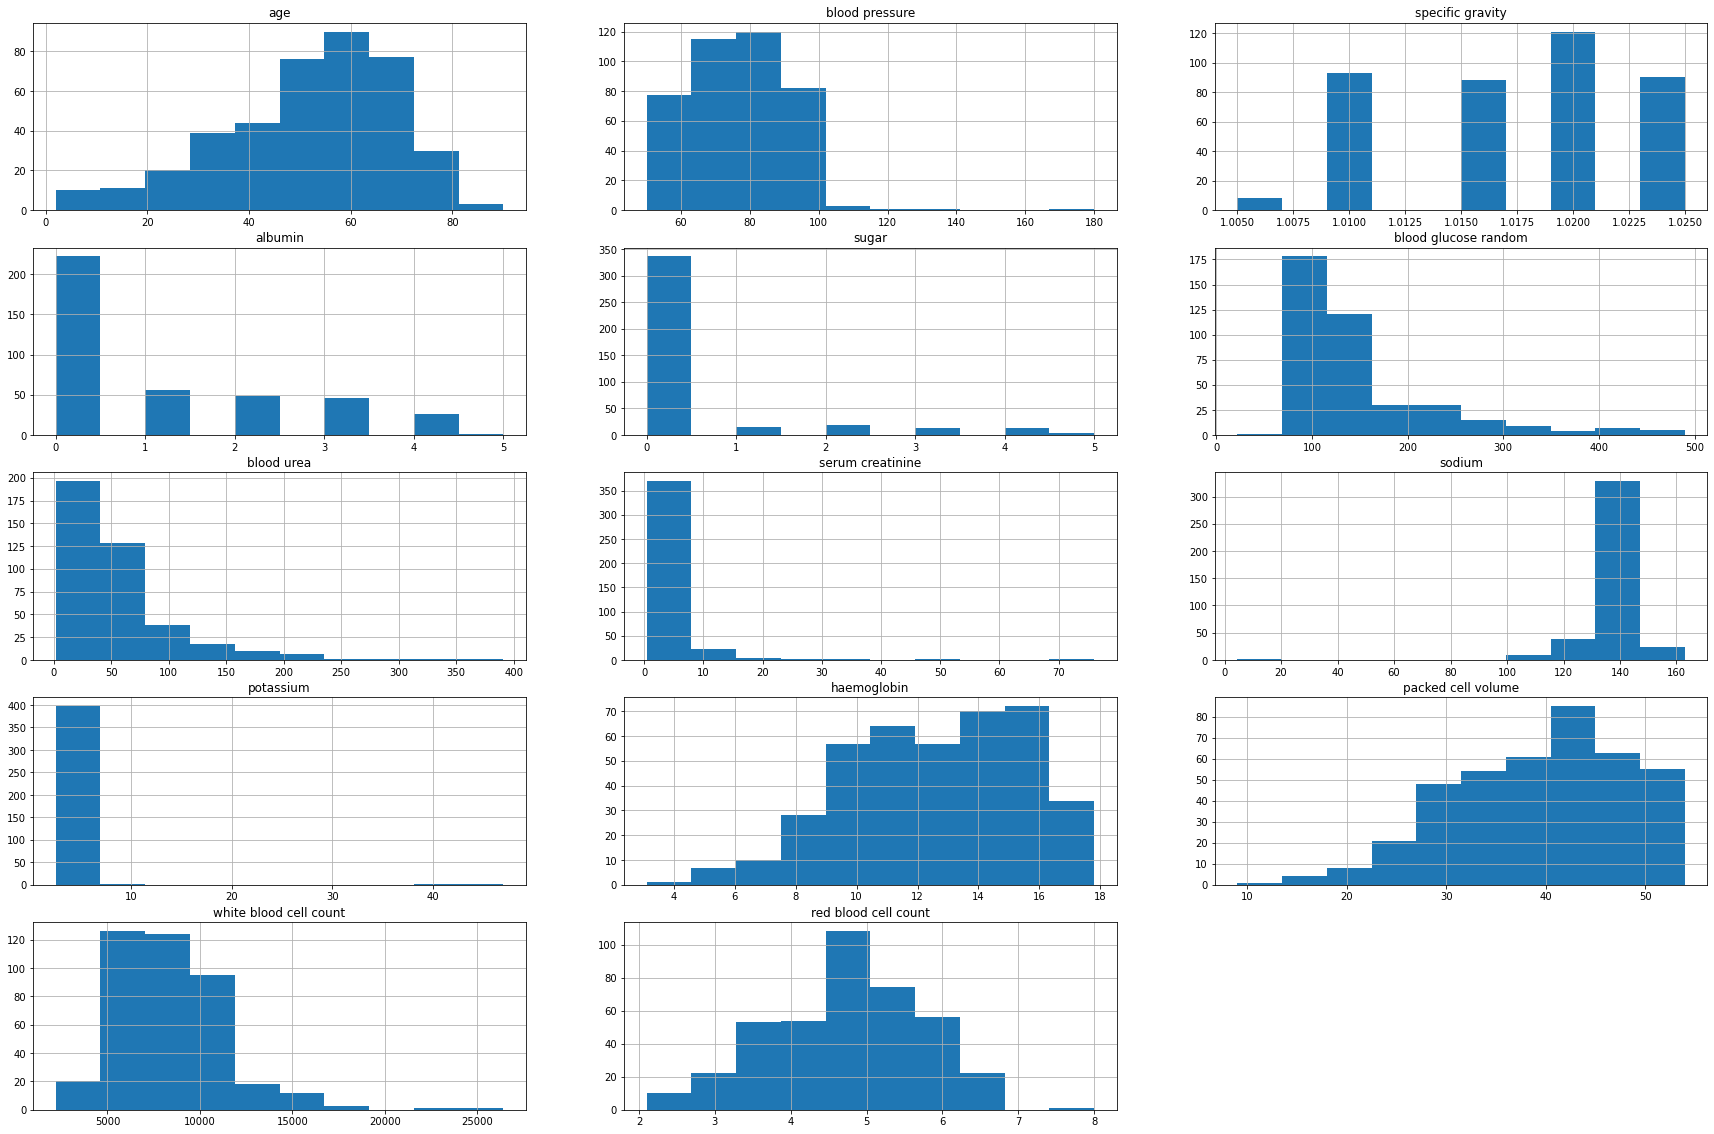

In [14]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    data[feature].hist()
    plt.title(feature)

C:\Users\subhr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\subhr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\subhr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\subhr\anaconda3\lib\si

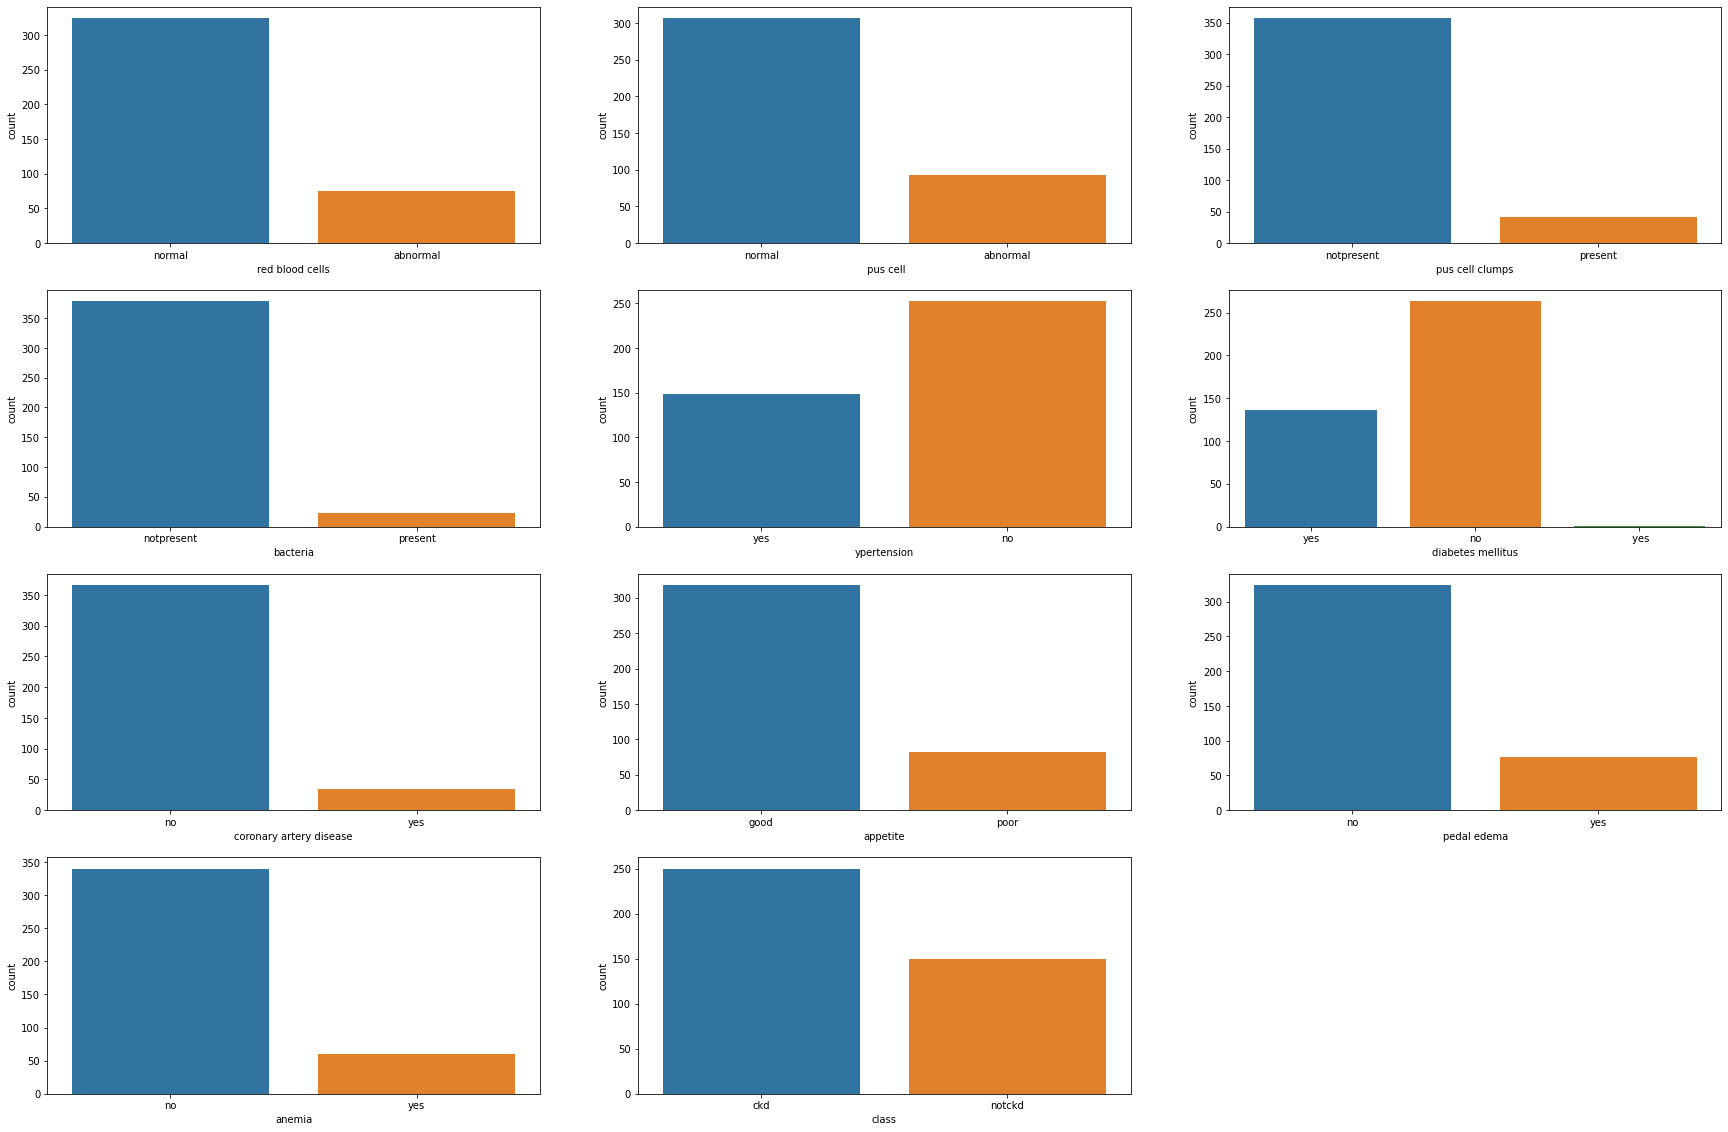

In [15]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(data[feature])

<AxesSubplot:>

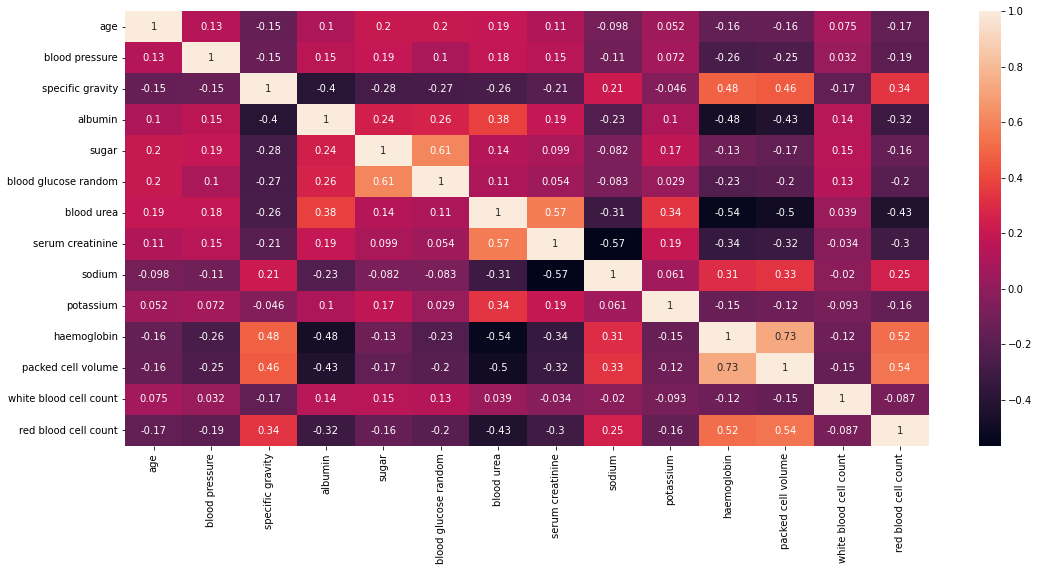

In [16]:
plt.figure(figsize=(18,8)) 
sns.heatmap(data.corr(),annot=True)

In [17]:
!pip install plotly

C:\Users\subhr\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


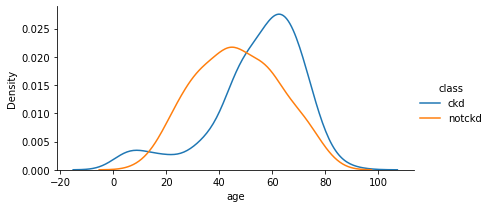

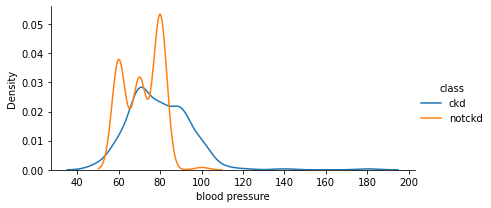

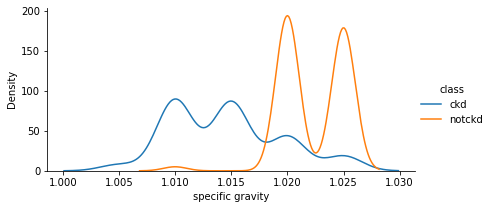

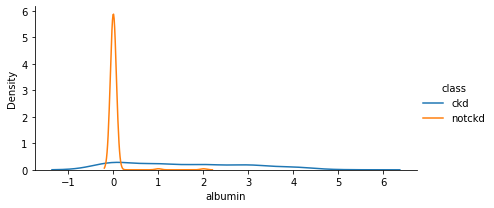

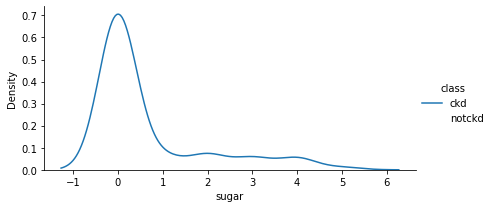

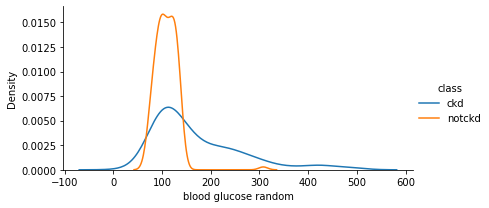

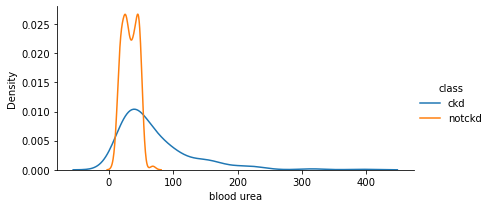

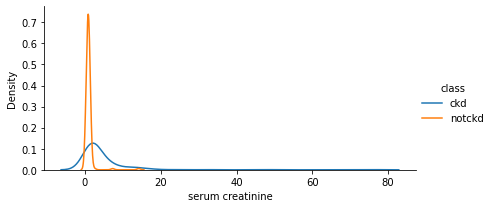

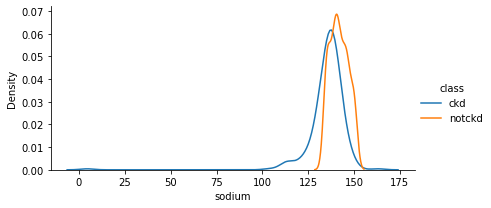

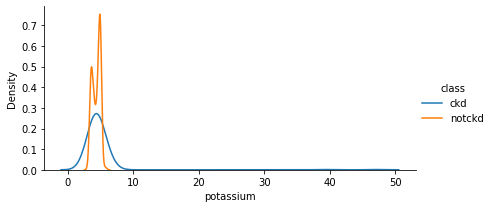

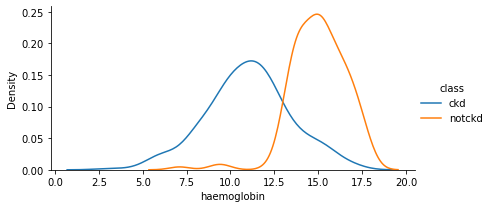

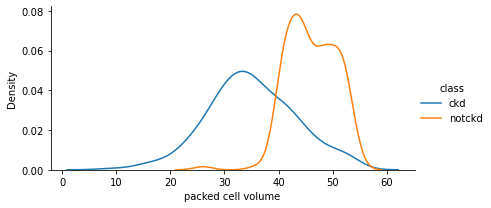

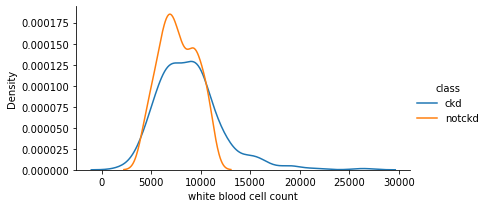

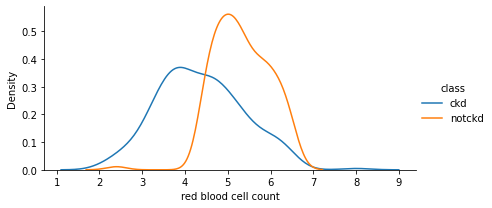

In [18]:
from Function_File import *
num_col
for i in num_col:
    kdeplot(data,i) 

In [19]:
#To study the RBC Count with respect to different features grouped with class
Feature_Study = input(" Enter the Feature (Having object dtype preferably) to study with red blood cell count:  ")
for i in data.columns:
    if i==Feature_Study:
        print(data.groupby([i,'class'])['red blood cell count'].agg(['count','mean','median','min','max']), end='\n \n \n')

 Enter the Feature (Having object dtype preferably) to study with red blood cell count:  anemia
               count      mean  median  min  max
anemia class                                    
no     ckd       190  4.528421    4.45  2.4  8.0
       notckd    150  5.331333    5.25  2.4  6.5
yes    ckd        60  3.865000    3.75  2.1  6.4
 
 


In [20]:
#To study the WBC Count with respect to different features grouped with class
Feature_Study = input(" Enter the Feature (Having object dtype preferably) to study with white blood cell count:  ")
for i in data.columns:
    if i==Feature_Study:
        print(data.groupby([i,'class'])['white blood cell count'].agg(['count','mean','median','min','max']), end='\n \n \n')

 Enter the Feature (Having object dtype preferably) to study with white blood cell count:  anemia
               count         mean  median     min      max
anemia class                                              
no     ckd       190  8948.421053  8600.0  2200.0  26400.0
       notckd    150  7694.666667  7500.0  4300.0  11000.0
yes    ckd        60  8551.666667  7950.0  2600.0  21600.0
 
 


In [21]:
!pip install tabulate
from tabulate import tabulate

In [22]:
g=[['Name','count','mean','median','min','max']]
for i in data.columns:
    if data[i].dtypes=='float64':
        d=[i, data[i].count(), data[i].mean(), data[i].median(), data[i].min(), data[i].max()]
        g.append(d)      
print(tabulate(g, headers='firstrow'))

Name                      count        mean    median       min        max
----------------------  -------  ----------  --------  --------  ---------
age                         400    51.625       54.5      2         90
blood pressure              400    76.575       80       50        180
specific gravity            400     1.0174       1.02     1.005      1.025
albumin                     400     1.0025       0        0          5
sugar                       400     0.41         0        0          5
blood glucose random        400   147.735      120       22        490
blood urea                  400    56.463       41.5      1.5      391
serum creatinine            400     3.10362      1.3      0.4       76
sodium                      400   137.729      138        4.5      163
potassium                   400     4.57825      4.4      2.5       47
haemoglobin                 400    12.5155      12.65     3.1       17.8
packed cell volume          400    39.205       41        9    

### Selecting Best Feature From the List

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    data[col]=le.fit_transform(data[col])
data
#0 is ckd and 1 is non ckd

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,102.0,...,38.0,6000.0,6.4,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,1,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,1,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,1,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,1,0,0,0,0,1


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'


In [26]:
x=data[ind_col]
y=data[dep_col]

In [27]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=15)
ordered_feature=ordered_rank_feature.fit(x,y)
ordered_feature.scores_

array([1.13067713e+02, 8.17867015e+01, 5.51077911e-03, 2.31095761e+02,
       9.84000000e+01, 7.64082051e+00, 1.50204126e+01, 2.52000000e+01,
       1.32000000e+01, 2.40483399e+03, 2.40156019e+03, 3.37443879e+02,
       2.93578867e+01, 2.99229655e+00, 1.19835405e+02, 2.91593436e+02,
       1.49465421e+04, 1.83476589e+01, 8.56288288e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [28]:
data_score=pd.DataFrame(ordered_feature.scores_,columns=['score'])
print(data_score)

           score
0     113.067713
1      81.786701
2       0.005511
3     231.095761
4      98.400000
5       7.640821
6      15.020413
7      25.200000
8      13.200000
9    2404.833993
10   2401.560187
11    337.443879
12     29.357887
13      2.992297
14    119.835405
15    291.593436
16  14946.542143
17     18.347659
18     85.628829
19     20.439252
20     20.400000
21     49.200000
22     45.600000
23     36.000000


In [29]:
data_x=pd.DataFrame(x.columns,columns=['feature'])
features_rank=pd.concat([data_x,data_score],axis=1)
features_rank

,feature,score
0,age,113.067713
1,blood pressure,81.786701
2,specific gravity,0.005511
3,albumin,231.095761
4,sugar,98.400000
5,red blood cells,7.640821
6,pus cell,15.020413
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2404.833993


In [30]:
features_rank['score'].max()

14946.542143033901

In [31]:
features_rank.nlargest(8,'score')

,feature,score
16,white blood cell count,14946.542143
9,blood glucose random,2404.833993
10,blood urea,2401.560187
11,serum creatinine,337.443879
15,packed cell volume,291.593436
3,albumin,231.095761
14,haemoglobin,119.835405
0,age,113.067713


In [32]:
selected_columns=features_rank.nlargest(8,'score')['feature'].values
selected_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age'], dtype=object)

In [33]:
x_new=data[selected_columns]
x_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,age
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0
1,6000.0,102.0,18.0,0.8,38.0,4.0,11.3,7.0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0


In [34]:
len(x_new)

400

In [35]:
x_new.shape

(400, 8)

### Prediction Model

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y,random_state=0,test_size=0.20)

In [37]:
ytrain.value_counts() #Balanced Data

0    198
1    122
Name: class, dtype: int64

In [38]:
!pip install xgboost

from xgboost import XGBClassifier

In [39]:
classifier=XGBClassifier()

In [40]:
param={'learning_rate':[0.05, 0.1, 0.15, 0.20, 0.25, 0.3],
       'max_depth':[3,4,5,6,8,10,12,15],
        'min_child_weight':[1,3,5,7],
         'gamma':[0.0,0.1,0.2,0.4],
         'colsample_bytree':[0.3,0.4,0.7,0.5]}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier,param_distributions=param, n_iter=5, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)

In [42]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[20:53:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\subhr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [43]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [44]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

### Model Initialization

In [45]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
classifier.fit(xtrain,ytrain)

[20:53:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
ypred=classifier.predict(xtest)
ypred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(ytest,ypred)

array([[51,  1],
       [ 1, 27]], dtype=int64)

In [49]:
accuracy_score(ytest,ypred)

0.975

In [50]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(ytest, ypred))
print("Precision score:",metrics.precision_score(ytest, ypred))
print("Recall score:",metrics.recall_score(ytest, ypred))
print("F1 Score :",metrics.f1_score(ytest, ypred))

Accuracy score: 0.975
Precision score: 0.9642857142857143
Recall score: 0.9642857142857143
F1 Score : 0.9642857142857143
